In [1062]:
import pandas as pd


In [1063]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [1064]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1065]:
df=df.drop(columns=['customerID'])

In [1066]:
df.apply(lambda x: (x == ' ').sum())

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [1067]:
# Convert TotalCharges to numeric, forcing errors (like empty strings) to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges is NaN
df=df.dropna(subset=['TotalCharges'])

In [1068]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1069]:
df.apply(lambda x: (x == ' ').sum())

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [1070]:
df.duplicated().sum()

22

In [1071]:
df=df.drop_duplicates()

In [1072]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

In [1073]:
X=df.drop(columns=['Churn'])
Y=df['Churn']


In [1074]:
from sklearn.model_selection import train_test_split


In [1075]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [1076]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1077]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [1078]:
column=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for col in column:
  X_train[col]=encoder.fit_transform(X_train[col])
  X_test[col]=encoder.transform(X_test[col])

In [1079]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
542,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,19.55,19.55
2045,0,0,0,0,69,1,2,1,0,2,2,2,2,2,2,1,0,110.50,7455.45
1063,1,0,0,0,10,1,0,0,2,0,0,2,2,0,0,0,0,62.25,612.95
6985,1,0,1,1,37,0,1,0,2,0,2,2,0,0,1,1,2,40.20,1525.35
414,0,1,1,0,48,1,0,1,0,0,0,0,0,0,0,1,0,70.65,3545.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,0,0,1,0,18,1,0,0,0,0,0,2,0,0,0,1,3,50.30,908.75
2676,0,0,0,0,29,1,0,2,1,1,1,1,1,1,1,0,3,20.35,617.35
2880,1,0,0,0,12,1,0,1,0,0,0,0,0,2,0,1,0,79.95,1043.40
5121,1,0,0,0,29,1,2,0,0,2,2,0,0,2,1,0,1,70.90,1964.60


In [1080]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',random_state=2,max_depth=5)


In [1081]:
df.isna().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [1082]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, random_state=2)

In [1083]:

Y_predict=model.predict(X_test)

In [1084]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [1085]:
print("accuracy score:")
print(accuracy_score(Y_test,Y_predict))

accuracy score:
0.7910128388017118


In [1086]:

print("confusion matrix:")
print(confusion_matrix(Y_test,Y_predict))

confusion matrix:
[[938  94]
 [199 171]]


In [1087]:


print("classification report")
print(classification_report(Y_test,Y_predict))

classification report
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1032
         Yes       0.65      0.46      0.54       370

    accuracy                           0.79      1402
   macro avg       0.74      0.69      0.70      1402
weighted avg       0.78      0.79      0.78      1402



In [1088]:
from sklearn.model_selection import cross_val_score

accuracies=cross_val_score(estimator=model,X=X_train,y=Y_train,cv=5)
print(accuracies)

average_accuracy = accuracies.mean()
print(f"Average Cross-validation Accuracy: {average_accuracy}")

[0.77272727 0.78253119 0.78966132 0.79393399 0.7618198 ]
Average Cross-validation Accuracy: 0.7801347154708124


[Text(0.5, 0.9166666666666666, 'x[14] <= 0.5\ngini = 0.39\nsamples = 5608\nvalue = [4121, 1487]'),
 Text(0.25, 0.75, 'x[8] <= 0.5\ngini = 0.489\nsamples = 3082\nvalue = [1773.0, 1309.0]'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[4] <= 7.5\ngini = 0.5\nsamples = 2097\nvalue = [1027, 1070]'),
 Text(0.0625, 0.4166666666666667, 'x[7] <= 0.5\ngini = 0.45\nsamples = 835\nvalue = [286, 549]'),
 Text(0.03125, 0.25, 'x[18] <= 77.7\ngini = 0.5\nsamples = 325\nvalue = [158, 167]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.477\nsamples = 160\nvalue = [63, 97]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.489\nsamples = 165\nvalue = [95.0, 70.0]'),
 Text(0.09375, 0.25, 'x[18] <= 124.475\ngini = 0.376\nsamples = 510\nvalue = [128, 382]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.246\nsamples = 181\nvalue = [26, 155]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.428\nsamples = 329\nvalue = [102, 227]'),
 Text(0.1875, 0.4166666666666667, 'x[7

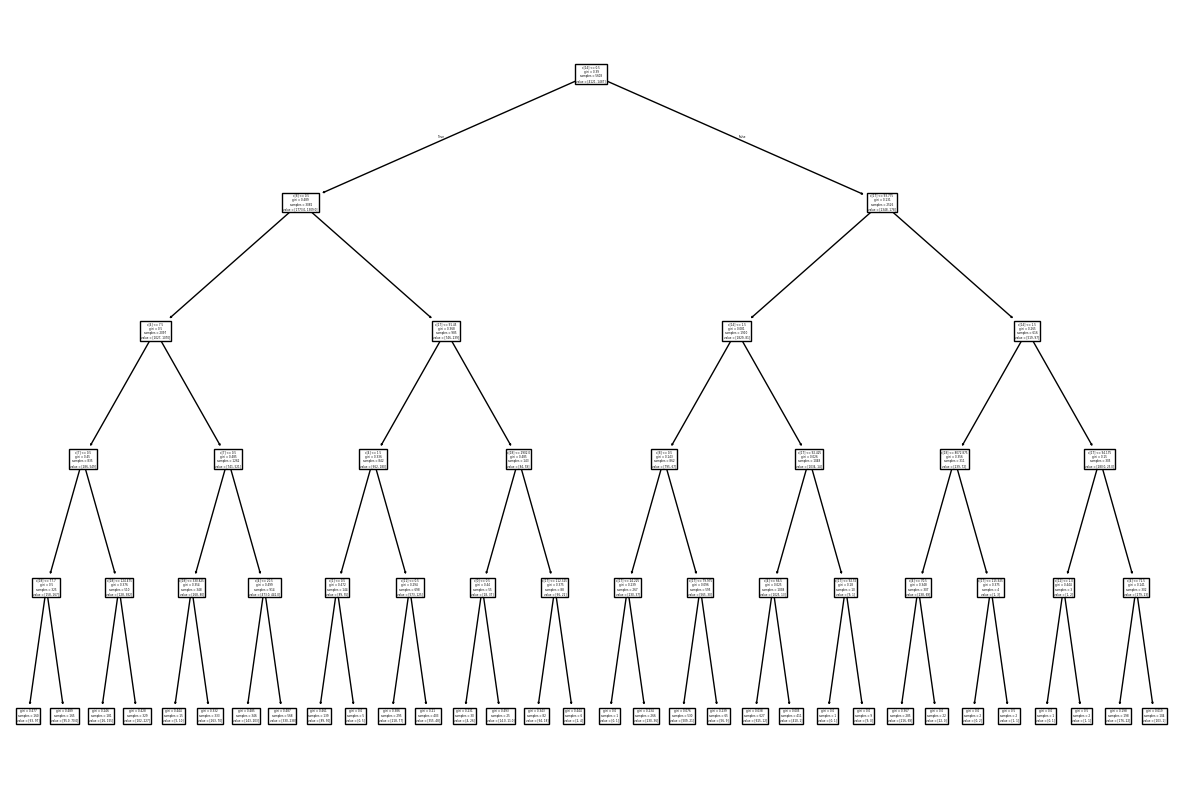

In [1089]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(model)

In [1090]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(criterion='gini',random_state=5,max_depth=10)

In [1091]:
model1.fit(X_train,Y_train)


RandomForestClassifier(max_depth=10, random_state=5)

In [1092]:
Y_predict1=model1.predict(X_test)

In [1093]:
print("accuracy score:")
print(accuracy_score(Y_test,Y_predict1))

print("confusion matrix:")
print(confusion_matrix(Y_test,Y_predict1))

print("classification report")
print(classification_report(Y_test,Y_predict1))

accuracy score:
0.8009985734664765
confusion matrix:
[[937  95]
 [184 186]]
classification report
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1032
         Yes       0.66      0.50      0.57       370

    accuracy                           0.80      1402
   macro avg       0.75      0.71      0.72      1402
weighted avg       0.79      0.80      0.79      1402

